In [ ]:
#%% init
import tensorflow as tf
# import tensorflow_addons as tfa

from tensorflow.keras import models, layers
import tensorflow_datasets as tfds
from tensorflow.keras.callbacks import Callback

import numpy as np
import os
# import gc
import matplotlib.pyplot as plt
import random


In [ ]:
# %% parameters
######### Adjust these parameters ########
batchSize = 16
imageSize = 28

try:
    del dataSets
    del trainSet
    del testSet
except:
    pass


In [ ]:
# %% dataset preparing
dataSets, inf = tfds.load(name='fashion_mnist', as_supervised=True, with_info=True, split=None)
trainData, testData = dataSets['train'], dataSets['test']


# normalization
def scale(currentImage, currentLabel):
    # currentImage = tf.image.resize_with_pad(currentImage, imageSize, imageSize, method='bicubic')
    return tf.cast(currentImage, tf.float32)/ 255.0, currentLabel

trainSet = trainData.map(scale, num_parallel_calls=tf.data.experimental.AUTOTUNE)
testSet = testData.map(scale, num_parallel_calls=tf.data.experimental.AUTOTUNE)


testSet = testSet.batch(batchSize).cache().prefetch(tf.data.experimental.AUTOTUNE)


# data augmentation
def dataAug(currentImage, currentLabel):
    currentImage = tf.image.random_flip_left_right(currentImage)
    newSize = random.randint(int(imageSize * 1.0), int(imageSize * 1.3))
    currentImage = tf.image.resize_with_pad(currentImage, newSize, newSize, method='bicubic')
    currentImage = tf.image.random_crop(currentImage, [tf.shape(currentImage)[0], imageSize, imageSize, 1])
    return currentImage, currentLabel

trainSet = trainSet.cache().shuffle(inf.splits['train'].num_examples, seed=8).batch(batchSize)
trainSet = trainSet.map(dataAug, num_parallel_calls=tf.data.experimental.AUTOTUNE)
trainSet = trainSet.prefetch(tf.data.experimental.AUTOTUNE) 

class ThisIsACallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        list_acc.append(logs['accuracy'])
        list_val_acc.append(logs['val_accuracy'])
        list_loss.append(logs['loss'])
        list_val_loss.append(logs['val_loss'])
        if epoch%3==0: 
            plt.plot(list_acc, label='Training Accuracy')
            plt.plot(list_val_acc, label='Test Accuracy')
            plt.title('Model Accuracy')
            plt.legend()
            plt.ylim([min(plt.ylim()),1])
            plt.grid()
            plt.show()


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePMBJJE/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompletePMBJJE/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# %% parameters
######### Adjust these parameters ########
epochSize = 100

try:
    myModel.reset_states()
    del myModel
    del track
except:
    pass


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        288       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9216      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 28, 28, 32)        0

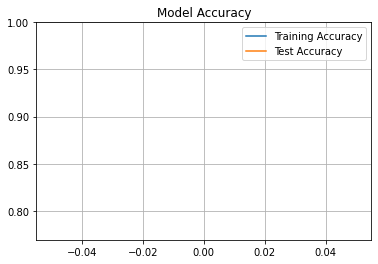

3750/3750 [==============================] - 28s 7ms/step - loss: 0.6235 - accuracy: 0.7729 - val_loss: 0.4267 - val_accuracy: 0.8461
Epoch 2/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.4002 - accuracy: 0.8569 - val_loss: 0.3499 - val_accuracy: 0.8684
Epoch 3/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.3477 - accuracy: 0.8778 - val_loss: 0.3118 - val_accuracy: 0.8859
Epoch 4/100
3744/3750 [============================>.] - ETA: 0s - loss: 0.3160 - accuracy: 0.8877

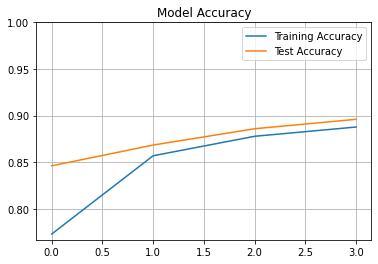

3750/3750 [==============================] - 26s 7ms/step - loss: 0.3158 - accuracy: 0.8877 - val_loss: 0.2812 - val_accuracy: 0.8960
Epoch 5/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.3005 - accuracy: 0.8934 - val_loss: 0.2916 - val_accuracy: 0.8944
Epoch 6/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2825 - accuracy: 0.8990 - val_loss: 0.2392 - val_accuracy: 0.9130
Epoch 7/100
3746/3750 [============================>.] - ETA: 0s - loss: 0.2725 - accuracy: 0.9027

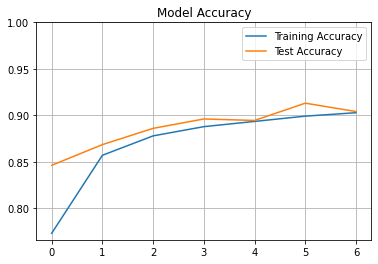

3750/3750 [==============================] - 27s 7ms/step - loss: 0.2724 - accuracy: 0.9028 - val_loss: 0.2698 - val_accuracy: 0.9040
Epoch 8/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2646 - accuracy: 0.9068 - val_loss: 0.2350 - val_accuracy: 0.9151
Epoch 9/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2516 - accuracy: 0.9109 - val_loss: 0.2306 - val_accuracy: 0.9149
Epoch 10/100
3746/3750 [============================>.] - ETA: 0s - loss: 0.2484 - accuracy: 0.9121

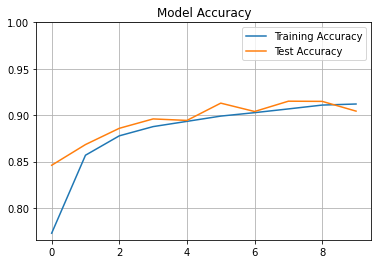

3750/3750 [==============================] - 27s 7ms/step - loss: 0.2483 - accuracy: 0.9121 - val_loss: 0.2539 - val_accuracy: 0.9044
Epoch 11/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2401 - accuracy: 0.9142 - val_loss: 0.2289 - val_accuracy: 0.9188
Epoch 12/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2355 - accuracy: 0.9162 - val_loss: 0.2148 - val_accuracy: 0.9208
Epoch 13/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.2333 - accuracy: 0.9171

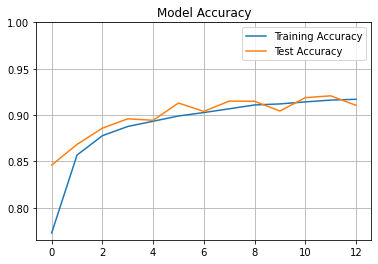

3750/3750 [==============================] - 27s 7ms/step - loss: 0.2334 - accuracy: 0.9171 - val_loss: 0.2487 - val_accuracy: 0.9105
Epoch 14/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2265 - accuracy: 0.9197 - val_loss: 0.2072 - val_accuracy: 0.9241
Epoch 15/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2222 - accuracy: 0.9212 - val_loss: 0.2393 - val_accuracy: 0.9122
Epoch 16/100
3744/3750 [============================>.] - ETA: 0s - loss: 0.2213 - accuracy: 0.9219

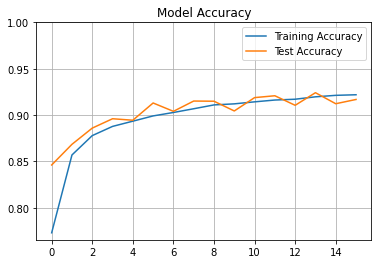

3750/3750 [==============================] - 27s 7ms/step - loss: 0.2214 - accuracy: 0.9219 - val_loss: 0.2272 - val_accuracy: 0.9168
Epoch 17/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2176 - accuracy: 0.9220 - val_loss: 0.2123 - val_accuracy: 0.9225
Epoch 18/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2111 - accuracy: 0.9249 - val_loss: 0.1965 - val_accuracy: 0.9268
Epoch 19/100
3748/3750 [============================>.] - ETA: 0s - loss: 0.2086 - accuracy: 0.9252

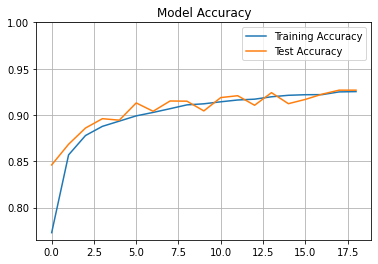

3750/3750 [==============================] - 27s 7ms/step - loss: 0.2086 - accuracy: 0.9252 - val_loss: 0.2017 - val_accuracy: 0.9268
Epoch 20/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2064 - accuracy: 0.9257 - val_loss: 0.2134 - val_accuracy: 0.9222
Epoch 21/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2017 - accuracy: 0.9279 - val_loss: 0.2274 - val_accuracy: 0.9158
Epoch 22/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.2044 - accuracy: 0.9269

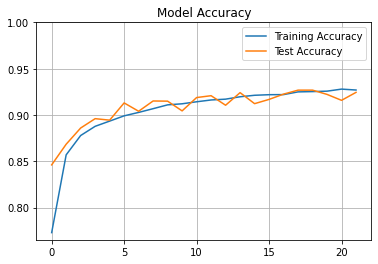

3750/3750 [==============================] - 27s 7ms/step - loss: 0.2043 - accuracy: 0.9269 - val_loss: 0.2094 - val_accuracy: 0.9244
Epoch 23/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.2005 - accuracy: 0.9289 - val_loss: 0.1998 - val_accuracy: 0.9278
Epoch 24/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1977 - accuracy: 0.9294 - val_loss: 0.2015 - val_accuracy: 0.9257
Epoch 25/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.1934 - accuracy: 0.9315

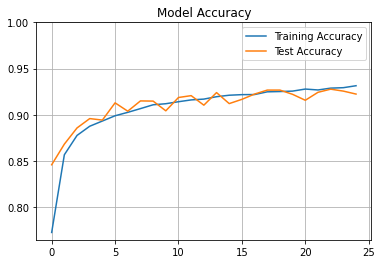

3750/3750 [==============================] - 27s 7ms/step - loss: 0.1934 - accuracy: 0.9315 - val_loss: 0.2196 - val_accuracy: 0.9225
Epoch 26/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1932 - accuracy: 0.9311 - val_loss: 0.2025 - val_accuracy: 0.9265
Epoch 27/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1939 - accuracy: 0.9307 - val_loss: 0.1912 - val_accuracy: 0.9331
Epoch 28/100
3750/3750 [==============================] - ETA: 0s - loss: 0.1898 - accuracy: 0.9320

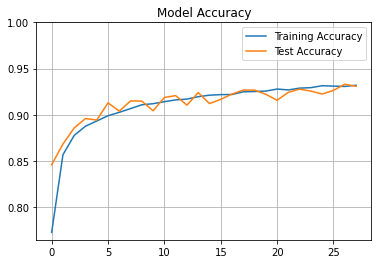

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1898 - accuracy: 0.9320 - val_loss: 0.1893 - val_accuracy: 0.9309
Epoch 29/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.1866 - accuracy: 0.9337 - val_loss: 0.2021 - val_accuracy: 0.9266
Epoch 30/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1859 - accuracy: 0.9338 - val_loss: 0.2063 - val_accuracy: 0.9283
Epoch 31/100
3744/3750 [============================>.] - ETA: 0s - loss: 0.1854 - accuracy: 0.9330

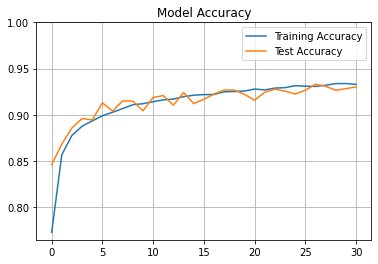

3750/3750 [==============================] - 27s 7ms/step - loss: 0.1857 - accuracy: 0.9329 - val_loss: 0.1941 - val_accuracy: 0.9302
Epoch 32/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1845 - accuracy: 0.9336 - val_loss: 0.2020 - val_accuracy: 0.9275
Epoch 33/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1797 - accuracy: 0.9355 - val_loss: 0.1874 - val_accuracy: 0.9302
Epoch 34/100
3745/3750 [============================>.] - ETA: 0s - loss: 0.1825 - accuracy: 0.9348

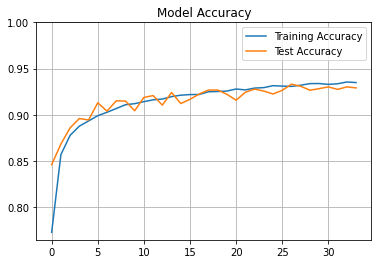

3750/3750 [==============================] - 27s 7ms/step - loss: 0.1825 - accuracy: 0.9349 - val_loss: 0.1983 - val_accuracy: 0.9291
Epoch 35/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1775 - accuracy: 0.9366 - val_loss: 0.1938 - val_accuracy: 0.9276
Epoch 36/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.1784 - accuracy: 0.9363 - val_loss: 0.1979 - val_accuracy: 0.9294
Epoch 37/100
3750/3750 [==============================] - ETA: 0s - loss: 0.1767 - accuracy: 0.9367

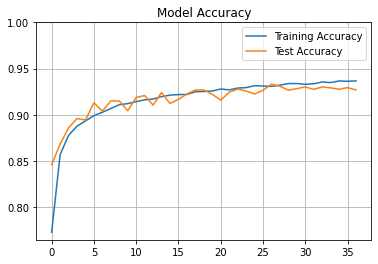

3750/3750 [==============================] - 27s 7ms/step - loss: 0.1767 - accuracy: 0.9367 - val_loss: 0.1991 - val_accuracy: 0.9269
Epoch 38/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1767 - accuracy: 0.9366 - val_loss: 0.1816 - val_accuracy: 0.9338
Epoch 39/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1743 - accuracy: 0.9360 - val_loss: 0.1923 - val_accuracy: 0.9289
Epoch 40/100
3745/3750 [============================>.] - ETA: 0s - loss: 0.1722 - accuracy: 0.9376

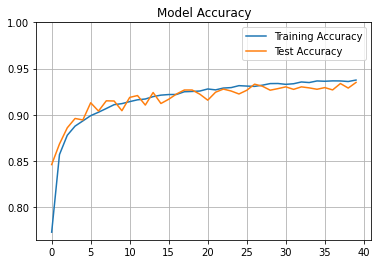

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1723 - accuracy: 0.9376 - val_loss: 0.1787 - val_accuracy: 0.9350
Epoch 41/100
3750/3750 [==============================] - 27s 7ms/step - loss: 0.1712 - accuracy: 0.9383 - val_loss: 0.1882 - val_accuracy: 0.9308
Epoch 42/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1716 - accuracy: 0.9382 - val_loss: 0.1870 - val_accuracy: 0.9328
Epoch 43/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.1712 - accuracy: 0.9382

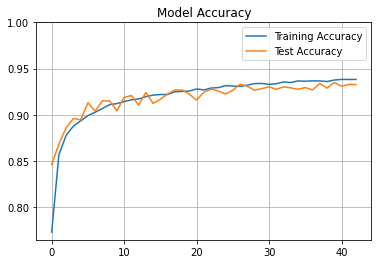

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1712 - accuracy: 0.9382 - val_loss: 0.1863 - val_accuracy: 0.9327
Epoch 44/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1681 - accuracy: 0.9405 - val_loss: 0.1782 - val_accuracy: 0.9383
Epoch 45/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1679 - accuracy: 0.9388 - val_loss: 0.1824 - val_accuracy: 0.9357
Epoch 46/100
3742/3750 [============================>.] - ETA: 0s - loss: 0.1653 - accuracy: 0.9411

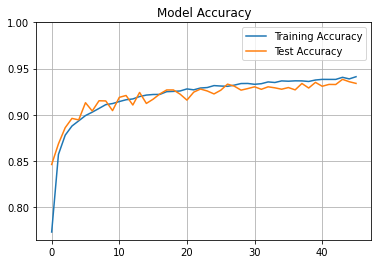

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1653 - accuracy: 0.9411 - val_loss: 0.1875 - val_accuracy: 0.9339
Epoch 47/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1647 - accuracy: 0.9409 - val_loss: 0.1850 - val_accuracy: 0.9350
Epoch 48/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1663 - accuracy: 0.9408 - val_loss: 0.1828 - val_accuracy: 0.9318
Epoch 49/100
3744/3750 [============================>.] - ETA: 0s - loss: 0.1644 - accuracy: 0.9409

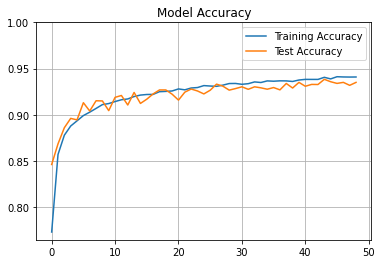

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1644 - accuracy: 0.9408 - val_loss: 0.1801 - val_accuracy: 0.9350
Epoch 50/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1629 - accuracy: 0.9412 - val_loss: 0.1861 - val_accuracy: 0.9330
Epoch 51/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1618 - accuracy: 0.9412 - val_loss: 0.1941 - val_accuracy: 0.9297
Epoch 52/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.1602 - accuracy: 0.9430

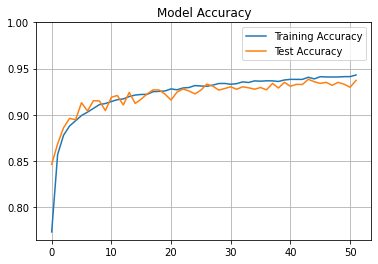

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1601 - accuracy: 0.9430 - val_loss: 0.1772 - val_accuracy: 0.9371
Epoch 53/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1623 - accuracy: 0.9414 - val_loss: 0.1902 - val_accuracy: 0.9317
Epoch 54/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1613 - accuracy: 0.9424 - val_loss: 0.1842 - val_accuracy: 0.9335
Epoch 55/100
3744/3750 [============================>.] - ETA: 0s - loss: 0.1595 - accuracy: 0.9428

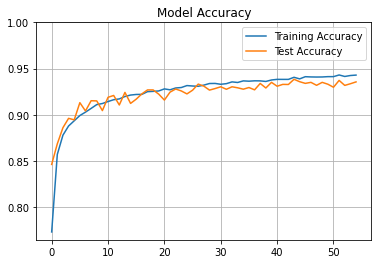

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1594 - accuracy: 0.9429 - val_loss: 0.1856 - val_accuracy: 0.9355
Epoch 56/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1609 - accuracy: 0.9430 - val_loss: 0.1870 - val_accuracy: 0.9356
Epoch 57/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1575 - accuracy: 0.9432 - val_loss: 0.1900 - val_accuracy: 0.9321
Epoch 58/100
3745/3750 [============================>.] - ETA: 0s - loss: 0.1544 - accuracy: 0.9446

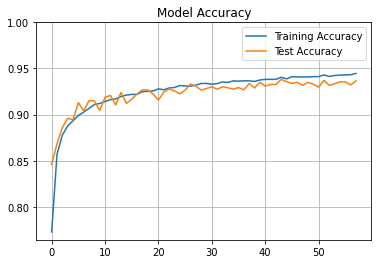

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1543 - accuracy: 0.9446 - val_loss: 0.1793 - val_accuracy: 0.9367
Epoch 59/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1549 - accuracy: 0.9451 - val_loss: 0.1831 - val_accuracy: 0.9371
Epoch 60/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1549 - accuracy: 0.9433 - val_loss: 0.1815 - val_accuracy: 0.9374
Epoch 61/100
3748/3750 [============================>.] - ETA: 0s - loss: 0.1560 - accuracy: 0.9441

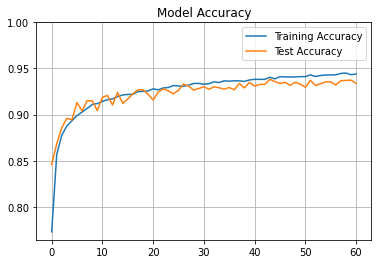

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1560 - accuracy: 0.9441 - val_loss: 0.1866 - val_accuracy: 0.9339
Epoch 62/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1565 - accuracy: 0.9441 - val_loss: 0.1785 - val_accuracy: 0.9356
Epoch 63/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1518 - accuracy: 0.9456 - val_loss: 0.1869 - val_accuracy: 0.9348
Epoch 64/100
3748/3750 [============================>.] - ETA: 0s - loss: 0.1527 - accuracy: 0.9450

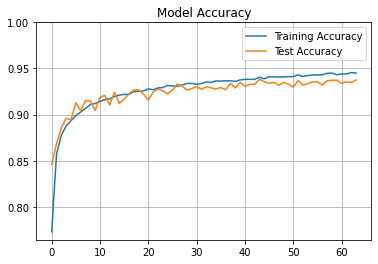

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1527 - accuracy: 0.9451 - val_loss: 0.1806 - val_accuracy: 0.9375
Epoch 65/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1508 - accuracy: 0.9451 - val_loss: 0.1874 - val_accuracy: 0.9324
Epoch 66/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1529 - accuracy: 0.9442 - val_loss: 0.1851 - val_accuracy: 0.9334
Epoch 67/100
3750/3750 [==============================] - ETA: 0s - loss: 0.1532 - accuracy: 0.9448

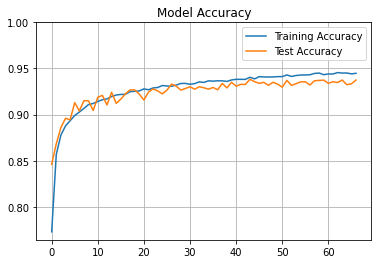

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1532 - accuracy: 0.9448 - val_loss: 0.1805 - val_accuracy: 0.9375
Epoch 68/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1521 - accuracy: 0.9454 - val_loss: 0.1859 - val_accuracy: 0.9325
Epoch 69/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1501 - accuracy: 0.9455 - val_loss: 0.1858 - val_accuracy: 0.9335
Epoch 70/100
3748/3750 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.9461

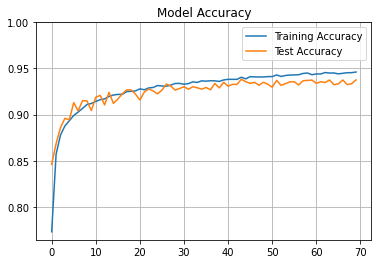

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1496 - accuracy: 0.9462 - val_loss: 0.1759 - val_accuracy: 0.9376
Epoch 71/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1470 - accuracy: 0.9461 - val_loss: 0.1945 - val_accuracy: 0.9329
Epoch 72/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1486 - accuracy: 0.9463 - val_loss: 0.1747 - val_accuracy: 0.9374
Epoch 73/100
3743/3750 [============================>.] - ETA: 0s - loss: 0.1497 - accuracy: 0.9456

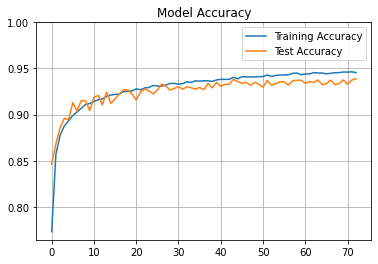

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1498 - accuracy: 0.9456 - val_loss: 0.1773 - val_accuracy: 0.9389
Epoch 74/100
3750/3750 [==============================] - 24s 6ms/step - loss: 0.1483 - accuracy: 0.9458 - val_loss: 0.1865 - val_accuracy: 0.9381
Epoch 75/100
3750/3750 [==============================] - 24s 6ms/step - loss: 0.1453 - accuracy: 0.9474 - val_loss: 0.1817 - val_accuracy: 0.9392
Epoch 76/100
3742/3750 [============================>.] - ETA: 0s - loss: 0.1442 - accuracy: 0.9479

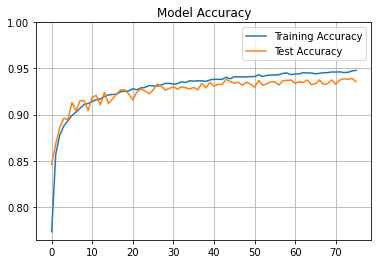

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1443 - accuracy: 0.9479 - val_loss: 0.1871 - val_accuracy: 0.9357
Epoch 77/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1477 - accuracy: 0.9466 - val_loss: 0.1796 - val_accuracy: 0.9378
Epoch 78/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1415 - accuracy: 0.9486 - val_loss: 0.1786 - val_accuracy: 0.9395
Epoch 79/100
3749/3750 [============================>.] - ETA: 0s - loss: 0.1482 - accuracy: 0.9467

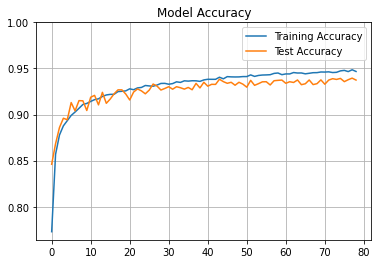

3750/3750 [==============================] - 26s 7ms/step - loss: 0.1482 - accuracy: 0.9467 - val_loss: 0.1758 - val_accuracy: 0.9374
Epoch 80/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1419 - accuracy: 0.9500 - val_loss: 0.1752 - val_accuracy: 0.9377
Epoch 81/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1439 - accuracy: 0.9485 - val_loss: 0.1725 - val_accuracy: 0.9368
Epoch 82/100
3743/3750 [============================>.] - ETA: 0s - loss: 0.1436 - accuracy: 0.9475

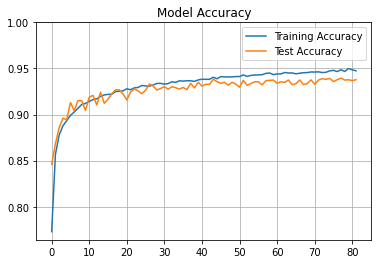

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1437 - accuracy: 0.9474 - val_loss: 0.1772 - val_accuracy: 0.9378
Epoch 83/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1403 - accuracy: 0.9484 - val_loss: 0.1762 - val_accuracy: 0.9401
Epoch 84/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1416 - accuracy: 0.9490 - val_loss: 0.1742 - val_accuracy: 0.9393
Epoch 85/100
3744/3750 [============================>.] - ETA: 0s - loss: 0.1435 - accuracy: 0.9481

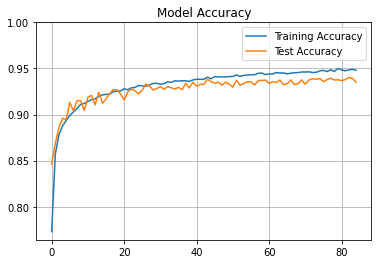

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1435 - accuracy: 0.9481 - val_loss: 0.1832 - val_accuracy: 0.9353
Epoch 86/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1415 - accuracy: 0.9485 - val_loss: 0.1780 - val_accuracy: 0.9368
Epoch 87/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1419 - accuracy: 0.9490 - val_loss: 0.1719 - val_accuracy: 0.9370
Epoch 88/100
3748/3750 [============================>.] - ETA: 0s - loss: 0.1386 - accuracy: 0.9503

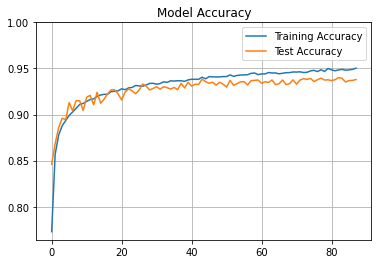

3750/3750 [==============================] - 24s 6ms/step - loss: 0.1386 - accuracy: 0.9503 - val_loss: 0.1775 - val_accuracy: 0.9380
Epoch 89/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1401 - accuracy: 0.9493 - val_loss: 0.1743 - val_accuracy: 0.9398
Epoch 90/100
3750/3750 [==============================] - 26s 7ms/step - loss: 0.1387 - accuracy: 0.9491 - val_loss: 0.1782 - val_accuracy: 0.9375
Epoch 91/100
3746/3750 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9487

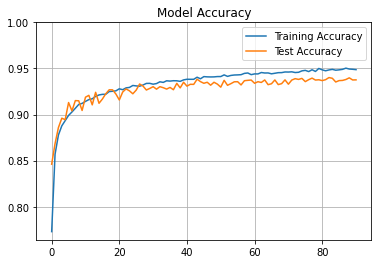

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1400 - accuracy: 0.9487 - val_loss: 0.1791 - val_accuracy: 0.9376
Epoch 92/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1387 - accuracy: 0.9501 - val_loss: 0.1694 - val_accuracy: 0.9392
Epoch 93/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1352 - accuracy: 0.9499 - val_loss: 0.1743 - val_accuracy: 0.9398
Epoch 94/100
3747/3750 [============================>.] - ETA: 0s - loss: 0.1385 - accuracy: 0.9494

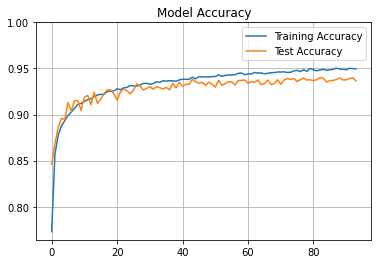

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1385 - accuracy: 0.9495 - val_loss: 0.1748 - val_accuracy: 0.9365
Epoch 95/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1355 - accuracy: 0.9507 - val_loss: 0.1853 - val_accuracy: 0.9379
Epoch 96/100
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1374 - accuracy: 0.9499 - val_loss: 0.1839 - val_accuracy: 0.9360
Epoch 97/100
3746/3750 [============================>.] - ETA: 0s - loss: 0.1342 - accuracy: 0.9506

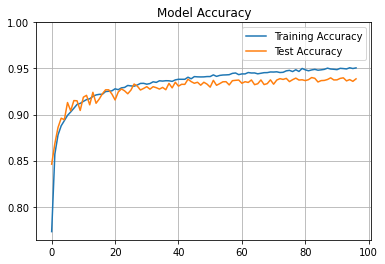

3750/3750 [==============================] - 25s 7ms/step - loss: 0.1341 - accuracy: 0.9506 - val_loss: 0.1731 - val_accuracy: 0.9387
Epoch 98/100
3750/3750 [==============================] - 24s 6ms/step - loss: 0.1344 - accuracy: 0.9517 - val_loss: 0.1765 - val_accuracy: 0.9400
Epoch 99/100
3750/3750 [==============================] - 24s 7ms/step - loss: 0.1356 - accuracy: 0.9509 - val_loss: 0.1692 - val_accuracy: 0.9405
Epoch 100/100
3742/3750 [============================>.] - ETA: 0s - loss: 0.1339 - accuracy: 0.9507

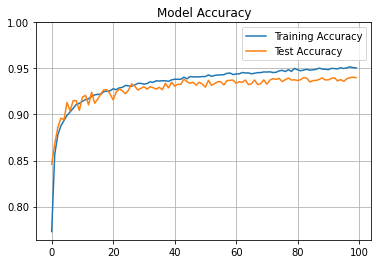

3750/3750 [==============================] - 24s 7ms/step - loss: 0.1341 - accuracy: 0.9507 - val_loss: 0.1784 - val_accuracy: 0.9399


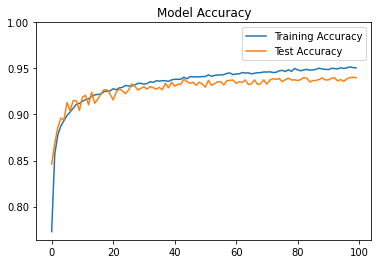

In [ ]:
# %% define model
list_acc = []
list_val_acc = []
list_loss = []
list_val_loss = []

initializer = tf.keras.initializers.he_normal() 

myModel = models.Sequential([
    layers.Conv2D(32, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer, input_shape=(imageSize, imageSize, 1)),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(32, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(40, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(40, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(40, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(40, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(40, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.1),
    layers.Conv2D(50, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),

    layers.Conv2D(50, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.2),
    layers.Conv2D(55, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.2),
    layers.Conv2D(67, (3, 3), use_bias=False, padding='same', kernel_initializer=initializer),
    layers.BatchNormalization(),
    layers.ReLU(),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),

    layers.Dense(10),
])

myModel.compile(
    metrics=['accuracy'], 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer='adam',
)


myModel.summary()

track = myModel.fit(
    trainSet, 
    # batchSize=batchSize,
    epochs=epochSize, 
    validation_data=testSet,
    callbacks=[ThisIsACallback()],
)

list_acc = track.history['accuracy']
list_val_acc = track.history['val_accuracy']
list_loss = track.history['loss']
list_val_loss = track.history['val_loss']
plt.plot(list_acc, label='Training Accuracy')
plt.plot(list_val_acc, label='Test Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Model Accuracy')
plt.legend()
plt.savefig('final.png')
plt.show()


myModel.save('model_save'+'.h5')

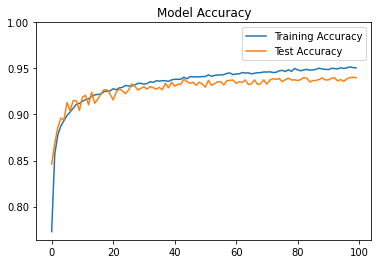

In [ ]:
list_acc = track.history['accuracy']
list_val_acc = track.history['val_accuracy']
list_loss = track.history['loss']
list_val_loss = track.history['val_loss']
plt.plot(list_acc, label='Training Accuracy')
plt.plot(list_val_acc, label='Test Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Model Accuracy')
plt.legend()
plt.savefig('final.png',dpi=1200)
plt.show()
myModel.save('model_save'+'.h5')

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)